                               career name in demand for the next 10 years?
0  Artificial-Intelligence-(AI)-Specialist                              yes
1                Machine Learning Engineer                              yes
2                           Data Scientist                              yes
3                    Cybersecurity Analyst                              yes
4                          Cloud Architect                              yes
found 200 datas
in demand for the next 10 years?
yes    100
no     100
Name: count, dtype: int64
<bound method NDFrame.head of                               type of career in demand
0    Artificial-Intelligence-(AI)-Specialist       yes
1                  Machine Learning Engineer       yes
2                             Data Scientist       yes
3                      Cybersecurity Analyst       yes
4                            Cloud Architect       yes
..                                       ...       ...
195                             

/var/folders/5y/q807tqrn4sz6_pmrttb197f00000gn/T/ipykernel_10783/3576412906.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  df_label.set_xticklabels(df['in demand'].unique())


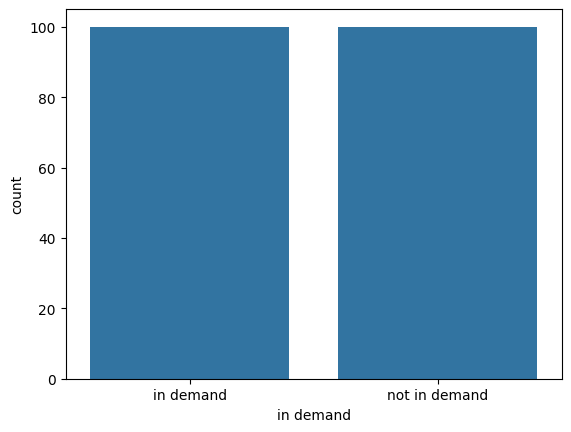

in demand
in demand        100
not in demand    100
Name: count, dtype: int64
Prediction for 'doctor': in demand
Accuracy: 0.675
Classification Report:
               precision    recall  f1-score   support

    in demand       0.75      0.57      0.65        21
not in demand       0.62      0.79      0.70        19

     accuracy                           0.68        40
    macro avg       0.69      0.68      0.67        40
 weighted avg       0.69      0.68      0.67        40



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score
import pickle

path = 'dataset.csv'
df = pd.read_csv(path)
df.head()

df = df.drop(['career pathway'], axis=1)
print(df.head())

print('found %s datas'% len(df))

print(df['in demand for the next 10 years?'].value_counts())

df = df.rename(columns={'career name': 'type of career', 'in demand for the next 10 years?': 'in demand'})
print(df.head)
df['in demand'] = df['in demand'].map({'yes': 'in demand', 'no': 'not in demand'})


df = df.groupby('in demand').head(200)

df_label = sns.countplot(x='in demand', data=df)
df_label.set_xticklabels(df['in demand'].unique())
plt.show()

print(df['in demand'].value_counts())

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['type of career'])
y = df['in demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

MultinomialNB()
pred_nb = clf_nb.predict(X_test)


# Transform the input text using the TF-IDF vectorizer
text = ['data scientist']
text_features = tfidf.transform(text)

# Use the trained Naive Bayes classifier to predict the label
prediction = clf_nb.predict(text_features)

# Print the prediction
print("Prediction for 'doctor':", prediction[0])


pickle.dump(clf_nb, open("naive_model.pkl",'wb'))

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_nb)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, pred_nb)

# Print the classification report
print("Classification Report:")
print(report)




